# Homework 4: Simulation, Sampling, and Bootstrapping

## Due Saturday, November 11th at 11:59PM

Welcome to Homework 4! This homework will cover:
- Simulations (see [CIT 9.3-9.4](https://inferentialthinking.com/chapters/09/3/Simulation.html))
- Sampling and Empirical Distributions (see [CIT 10-10.4](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html))
- Bootstrapping and Confidence Intervals (see [CIT 13.2](https://inferentialthinking.com/chapters/13/2/Bootstrap.html) and [CIT 13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html))

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

## 1. Lucky Triton Lotto, Continued  🔱 🎱 🧜

In the last homework, we calculated the probability of winning the grand prize (free housing) on a Lucky Triton Lotto lottery ticket, and found that it was quite low 😭.

In [2]:
# Just run this cell, do not change it!
free_housing_chance = (1 / 28) * (1 / 27) * (1 / 26) * (1 / 25) * (1 / 24) * (1 / 11)
free_housing_chance

7.708341041674375e-09

In this question, we'll approach the same question not using math, but using simulation. 

It's important to remember how this lottery works:
- When you buy a Lucky Triton Lotto ticket, you first pick five **different** numbers, one at a time, from 1 to 28. Then you separately pick a number from 1 to 11, which may or may not be the same as one of the first five. These are **your numbers**. For example, you may select (7, 12, 24, 15, 13, 3). This is a sequence of six numbers - **order matters**!
- The **winning numbers** are chosen by King Triton drawing five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 28. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 11. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (15, 9, 24, 23, 1, 3).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same positions**. In other words, your entire sequence of numbers must be exactly the same as the sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that your numbers are (7, 12, 24, 15, 13, 3) and the winning numbers are (15, 9, 24, 23, 1, 3). In this case, two of your numbers are considered to match two of the winning numbers. Notice that although both sequences include the number 15 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.

- Your numbers: (7, 12, **24**, 15, 13, **3**)
- Winning numbers: (15, 9, **24**, 23, 1, **3**)

**Question 1.1.** Implement a function called `simulate_one_ticket`. It should take no arguments, and it should return an array with 6 random numbers, simulating how the numbers are selected for a single Lucky Triton Lotto ticket. The first five numbers should all be randomly chosen without replacement, from 1 to 28. The last number should be between 1 and 11.

In [3]:
def simulate_one_ticket():
    """Simulate one Lucky Triton Lotto ticket."""
    first_five = np.random.choice(28, 5, replace=False) + 1
    return np.append(first_five, np.random.choice(11) + 1)

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** It's draw day. You checked the winning numbers King Triton drew, which happened to be **(26, 19, 24, 5, 12, 7)**. Below, calculate how many matches there are between the winning numbers and a randomly generated ticket, and save the result in `num_matches`. Remember, order matters when counting matches!

***Hint:*** You don't need a `for`-loop for this question. There is a one-line solution using `np.count_nonzero`.

In [5]:
winning = np.array([26, 19, 24, 5, 12, 7])
simulated_ticket = simulate_one_ticket()
num_matches = (
    np.count_nonzero(winning[0] == simulated_ticket[0]) +
    np.count_nonzero(winning[1] == simulated_ticket[1]) +
    np.count_nonzero(winning[2] == simulated_ticket[2]) +
    np.count_nonzero(winning[3] == simulated_ticket[3]) +
    np.count_nonzero(winning[4] == simulated_ticket[4]) +
    np.count_nonzero(winning[-1] == simulated_ticket[-1]) 
)
        


print(f"The number of matches between the winning numbers {winning} and the simulated ticket {simulated_ticket} is {num_matches}.")

The number of matches between the winning numbers [26 19 24  5 12  7] and the simulated ticket [28 15  1 22 18  3] is 0.


In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** You are disappointed because you bought a lottery ticket but you did not win free housing. To make yourself feel better, you write a simulation to remind yourself how unlikely it is to win the grand prize. 

Implement a simulation where you call the function `simulate_one_ticket` 100,000 times. In your 100,000 tickets, **how many times did you win the grand prize (free housing)?** Assign your answer to `count_free_housing`. (It would cost a fortune if you were to buy 100,000 tickets – it's pretty nice to be able to simulate this experiment instead of doing it in real life!) 

***Hint:*** Start by writing a simulation where you only buy 10 tickets. Once you are sure you have that figured out, then ramp it up to 100,000 tickets. This is a good general practice for writing simulations: start small! It may take a little while (up to a minute) for Python to perform the calculations when you are buying 100,000 tickets. 

In [7]:
winning = np.array([26, 19, 24, 5, 12, 7])
count_free_housing = 0
for i in range(100_000):
    simulated_ticket = simulate_one_ticket()
    num_matches = (
        np.count_nonzero(winning[0] == simulated_ticket[0]) +
        np.count_nonzero(winning[1] == simulated_ticket[1]) +
        np.count_nonzero(winning[2] == simulated_ticket[2]) +
        np.count_nonzero(winning[3] == simulated_ticket[3]) +
        np.count_nonzero(winning[4] == simulated_ticket[4]) +
        np.count_nonzero(winning[5] == simulated_ticket[5]) 
    )
    
    if num_matches == 6:
        count_free_housing += 1
    
count_free_housing

0

In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Remember, the mathematical probability of winning free housing is quite low, on the order of $10^{-9}$. That's a lot lower than than 1 in 100,000, which is $10^{-5}$.

**Question 1.4.** As we've seen, you would need to be extremely lucky to win the grand prize. To encourage more students to buy Lucky Triton Lotto tickets despite the terrible odds, there are some additional prizes. Students can win Triton Cash if *some* of their numbers match the corresponding winning numbers, as described in the introduction. Again, simulate the act of buying 100,000 tickets, but this time find **the greatest number of matches achieved by any of your tickets**, and assign this number to `most_matches`. 

For example, if 90,000 of your tickets matched 1 winning number and 10,000 of your tickets matched 2 winning numbers, then you would set `most_matches` to 2. If 99,999 of your tickets matched 1 winning number and one of your tickets matched 4 winning numbers, you would set `most_matches` to 4. If you happened to win the grand prize on one of your tickets, you would set `most_matches` to 6. 

***Hint:*** There are several ways to approach this; one way involves storing the number of matches per ticket in an array and finding the largest number in that array. 

In [9]:
winning = np.array([26, 19, 24, 5, 12, 7])
most_matches = 0
count_wins = [0, 0, 0, 0, 0, 0]

for i in range(100_000):
    
    simulated_ticket = simulate_one_ticket()
    num_matches = (
        np.count_nonzero(winning[0] == simulated_ticket[0]) +
        np.count_nonzero(winning[1] == simulated_ticket[1]) +
        np.count_nonzero(winning[2] == simulated_ticket[2]) +
        np.count_nonzero(winning[3] == simulated_ticket[3]) +
        np.count_nonzero(winning[4] == simulated_ticket[4]) +
        np.count_nonzero(winning[5] == simulated_ticket[5]) 
    )
    
    if num_matches == 6:
        count_wins[5] += 1
    elif num_matches == 5:
        count_wins[4] += 1
    elif num_matches == 4:
        count_wins[3] += 1
    elif num_matches == 3:
        count_wins[2] += 1
    elif num_matches == 2:
        count_wins[1] += 1
    elif num_matches == 1:
        count_wins[0] += 1
    
for i in count_wins:
    if i > 0:
        most_matches = count_wins.index(i) + 1

print(count_wins)        
most_matches

[21487, 2466, 144, 8, 0, 0]


4

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Suppose one Lucky Triton Lotto ticket costs $5.

The Lucky Triton Lotto advertisement on Instagram promises you will never lose money because of the following generous prizes:

- Win $10 with a 1-number match

- Win $25 with a 2-number match

- Win $100 with a 3-number match

- Win $1,000 with a 4-number match

- Win $5,000 with a 5-number match

- Win $20,000 with a 6-number match (free housing!)

If you had the money to buy 100,000 tickets, what would be your net winnings from buying these tickets? Since this is net winnings, this should account for the prizes you win and the cost of buying the tickets. Assign the amount to `net_winnings`. Note that a positive value means you won money overall, and a negative value means you lost money overall. Do you believe the advertisement's claims?

The winning numbers are the same from the previous part: **(26, 19, 24, 5, 12, 7)**.

***Hint:*** Again, there are a few ways you could approach this problem. One way involves generating another 100,000 random tickets and counting the amount earned per ticket, adding to a running total. Alternatively, if you created an array of the number of matches per ticket in Question 1.4, you could loop through that array. For practice, you can try solving this problem multiple ways!

In [11]:
net_winnings = 0
ticket_cost = 5
count_wins = [0, 0, 0, 0, 0, 0]

for i in range(100_000):
    
    simulated_ticket = simulate_one_ticket()
    num_matches = (
        np.count_nonzero(winning[0] == simulated_ticket[0]) +
        np.count_nonzero(winning[1] == simulated_ticket[1]) +
        np.count_nonzero(winning[2] == simulated_ticket[2]) +
        np.count_nonzero(winning[3] == simulated_ticket[3]) +
        np.count_nonzero(winning[4] == simulated_ticket[4]) +
        np.count_nonzero(winning[5] == simulated_ticket[5]) 
    )
    
    if num_matches == 6:
        count_wins[5] += 1
    elif num_matches == 5:
        count_wins[4] += 1
    elif num_matches == 4:
        count_wins[3] += 1
    elif num_matches == 3:
        count_wins[2] += 1
    elif num_matches == 2:
        count_wins[1] += 1
    elif num_matches == 1:
        count_wins[0] += 1
        
for i in count_wins:
    if count_wins.index(i) == 0:
        net_winnings += (i * 10)
    elif count_wins.index(i) == 1:
        net_winnings += (i * 25)
    elif count_wins.index(i) == 2:
        net_winnings += (i * 100)
    elif count_wins.index(i) == 3:
        net_winnings += (i * 1_000)
    elif count_wins.index(i) == 4:
        net_winnings += (i * 5_000)
    elif count_wins.index(i) == 5:
        net_winnings += (i * 20_000)
        
print(f'Gross Winnings: {net_winnings}')

net_winnings -= 500_000

print(f'Net Winnings: {net_winnings}')

Gross Winnings: 293920
Net Winnings: -206080


In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

## 2. Sampling with Netflix 🍿🎬

In this question, we will use a dataset consisting of information about all Netflix Original movies to get some practice with sampling. Run the cell below to load the data into a DataFrame, indexed by title.

In [13]:
# Just run this cell, do not change it!
movie_data = bpd.read_csv('data/netflix_originals.csv').set_index('Title')
movie_data

,Genre,Premiere,Runtime,IMDb Score,Language
Title,,,,,
Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
The Open House,Horror thriller,"January 19, 2018",94,3.2,English
Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...
Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


We've provided a function called `compute_statistics` that takes as input a DataFrame with two columns, `'Runtime'` and `'IMDb Score'`, and then:
- draws a histogram of `'Runtime'`,
- draws a histogram of `'IMDb Score'`, and
- returns a two-element array containing the mean `'Runtime'` and mean `'IMDb Score'`.

Run the cell below to define the `compute_statistics` function, and a helper function called `histograms`. Don't worry about how this code works, and please don't change anything.

In [14]:
# Don't change this cell, just run it.
def histograms(df):
    runtimes = df.get('Runtime').values
    ratings = df.get('IMDb Score').values
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=100)

    plt.subplot(1, 2, 1)
    plt.hist(runtimes, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 250, 10))
    plt.title('Distribution of Runtimes')

    plt.subplot(1, 2, 2)
    plt.hist(ratings, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 10, 0.4))
    plt.title('Distribution of IMDb Scores')
    
def compute_statistics(runtimes_and_ratings_data, draw=True):
    if draw:
        histograms(runtimes_and_ratings_data)
    avg_runtime = np.average(runtimes_and_ratings_data.get('Runtime').values)
    avg_rating = np.average(runtimes_and_ratings_data.get('IMDb Score').values)
    avg_array = np.array([avg_runtime, avg_rating]) 
    return avg_array

We can use this `compute_statistics` function to show the distribution of `'Runtime'` and `'IMDb Score'` and compute their means, for any collection of movies. 

Run the next cell to show these distributions and compute the means for all Netflix Original movies. Notice that an array containing the mean `'Runtime'` and mean `'IMDb Score'` values is displayed before the histograms.

array([93.57705479,  6.27174658])

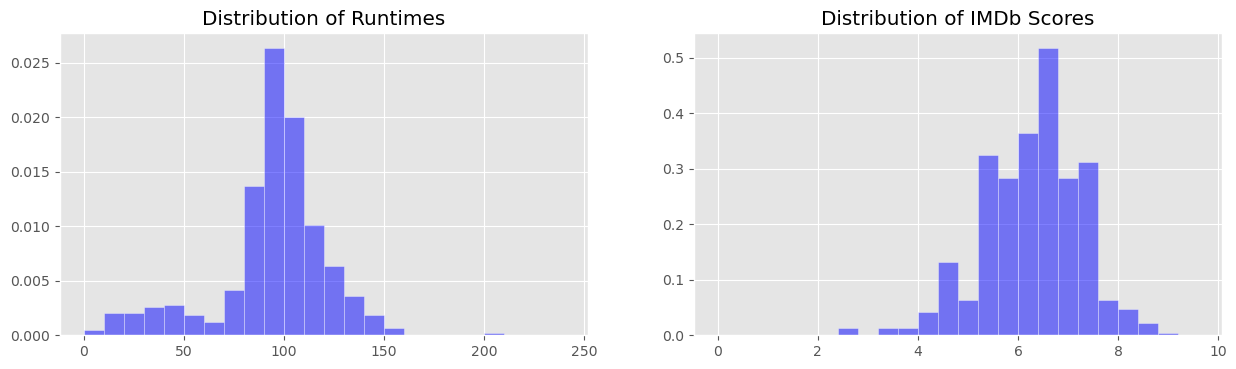

In [15]:
movie_stats = compute_statistics(movie_data)
movie_stats

Now, imagine that instead of having access to the full *population* of movies, we only have access to data on a smaller subset of movies, or a *sample*.  For 584 movies, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

**Statistical inference** is the process of using data in a sample to _infer_ some characteristic about the population from which the sample was drawn. A common strategy for statistical inference is to estimate parameters of the population by computing the same statistics on a sample. This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors.

One very important factor in the utility of samples is how they were gathered. Let's look at some different sampling strategies.

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose movies which are somehow convenient to sample.  For example, you might choose movies that you have personally watched, since it's easier to collect information about them.  This is called *convenience sampling*.

**Question 2.1.**  Suppose your favorite types of movies are rom-coms 🥰 and thrillers 😱, and you decide to manually look up information on all Netflix Original movies in the following genres:
- `'Romantic comedy'`
- `'Thriller'`

Assign `convenience_sample` to a subset of `movie_data` that contains only the rows for movies that are in one of these two genres.

In [16]:
convenience_sample = movie_data[(movie_data.get('Genre') == 'Romantic comedy') | (movie_data.get('Genre') == 'Thriller')]
convenience_sample

,Genre,Premiere,Runtime,IMDb Score,Language
Title,,,,,
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
Whipped,Romantic comedy,"September 18, 2020",97,4.1,Indonesian
Mercy,Thriller,"November 22, 2016",90,4.2,English
Secret Obsession,Thriller,"July 18, 2019",97,4.4,English
The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi
...,...,...,...,...,...
Calibre,Thriller,"June 29, 2018",101,6.8,English
AK vs AK,Thriller,"December 24, 2020",108,6.9,Hindi
To All the Boys I've Loved Before,Romantic comedy,"August 17, 2018",99,7.1,English


In [17]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Assign `convenience_stats` to an array of the mean `'Runtime'` and mean `'IMDb Score'` of your convenience sample.  Since they're computed on a sample, these are called *sample means*. 

***Hint:*** Use the function `compute_statistics`; it's okay if histograms are displayed as well.

array([102.72222222,   5.71805556])

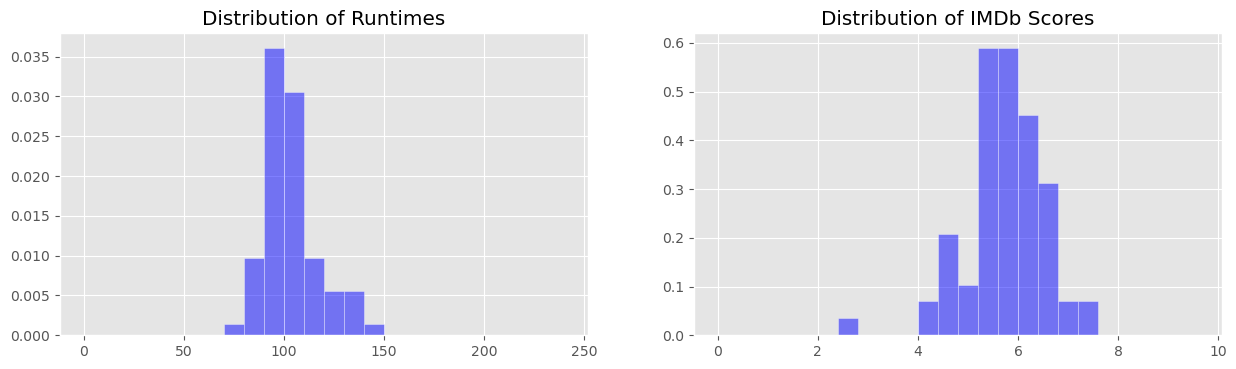

In [18]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [19]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Next, we'll compare the distribution of `'Runtime'` in our convenience sample to the distribution of `'Runtime'` for all the movies in our dataset.

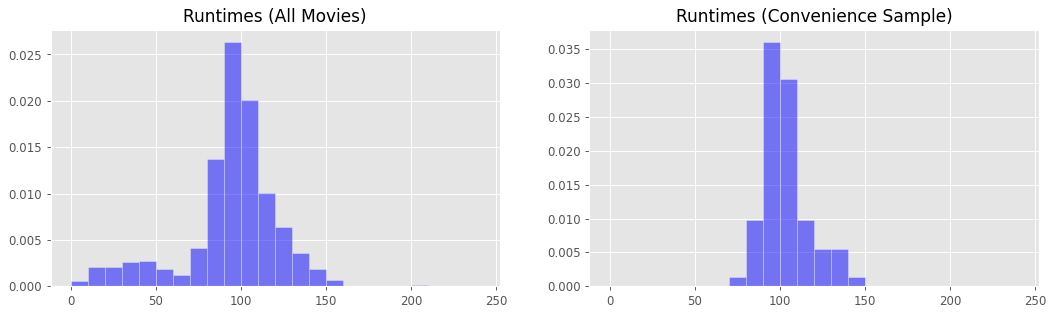

In [20]:
# Just run this cell, do not change it!
def compare_runtimes(first, second, first_title, second_title):
    """Compare the runtimes in two DataFrames."""
    bins = np.arange(0, 250, 10)
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=85)

    plt.subplot(1, 2, 1)
    plt.hist(first.get('Runtime'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Runtimes ({first_title})')
    
    plt.subplot(1, 2, 2)
    plt.hist(second.get('Runtime'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Runtimes ({second_title})')

compare_runtimes(movie_data, convenience_sample, 'All Movies', 'Convenience Sample')

**Question 2.3.** From what you see in the histograms above, did the convenience sample give us an accurate picture of the runtimes for the full population of movies?  Why or why not?

Assign either 1, 2, 3, or 4 to the variable `sampling_q3` below. 
1. Yes. The sample is large enough, so it is an accurate representation of the population.
1. No. Convenience samples generally don't give us an accurate representation of the population.
1. No. Normally convenience samples give us an accurate representation of the population, but we just got unlucky.
1. No. Normally convenience samples give us an accurate representation of the population, but only if the sample size is large enough. Our convenience sample here was too small.

In [21]:
sampling_q3 = 2

In [22]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Simple random sampling
A more principled approach is to sample uniformly at random from the movies.  If we ensure that each movie is selected at most once, this is a **random sample without replacement**, sometimes called a "**simple random sample**" or "**SRS**".  Imagine writing down each movie's title on a card, putting the cards in a hat, and shuffling the hat.  To sample, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two simple random samples of `ratings_data`: the variable `small_srs_data` contains a SRS of size 70, and the variable `large_srs_data` contains a SRS of size 180.

Now we'll run the same analyses on the small simple random sample, the large simple random sample, and the convenience sample. The subsequent code draws the histograms and computes the means for `'Runtime'` and `'IMDb Score'`.

Full data stats:                  [93.57705479  6.27174658]
Small SRS stats: [94.74285714  6.16571429]
Large SRS stats: [93.66666667  6.27111111]
Convenience sample stats:         [102.72222222   5.71805556]


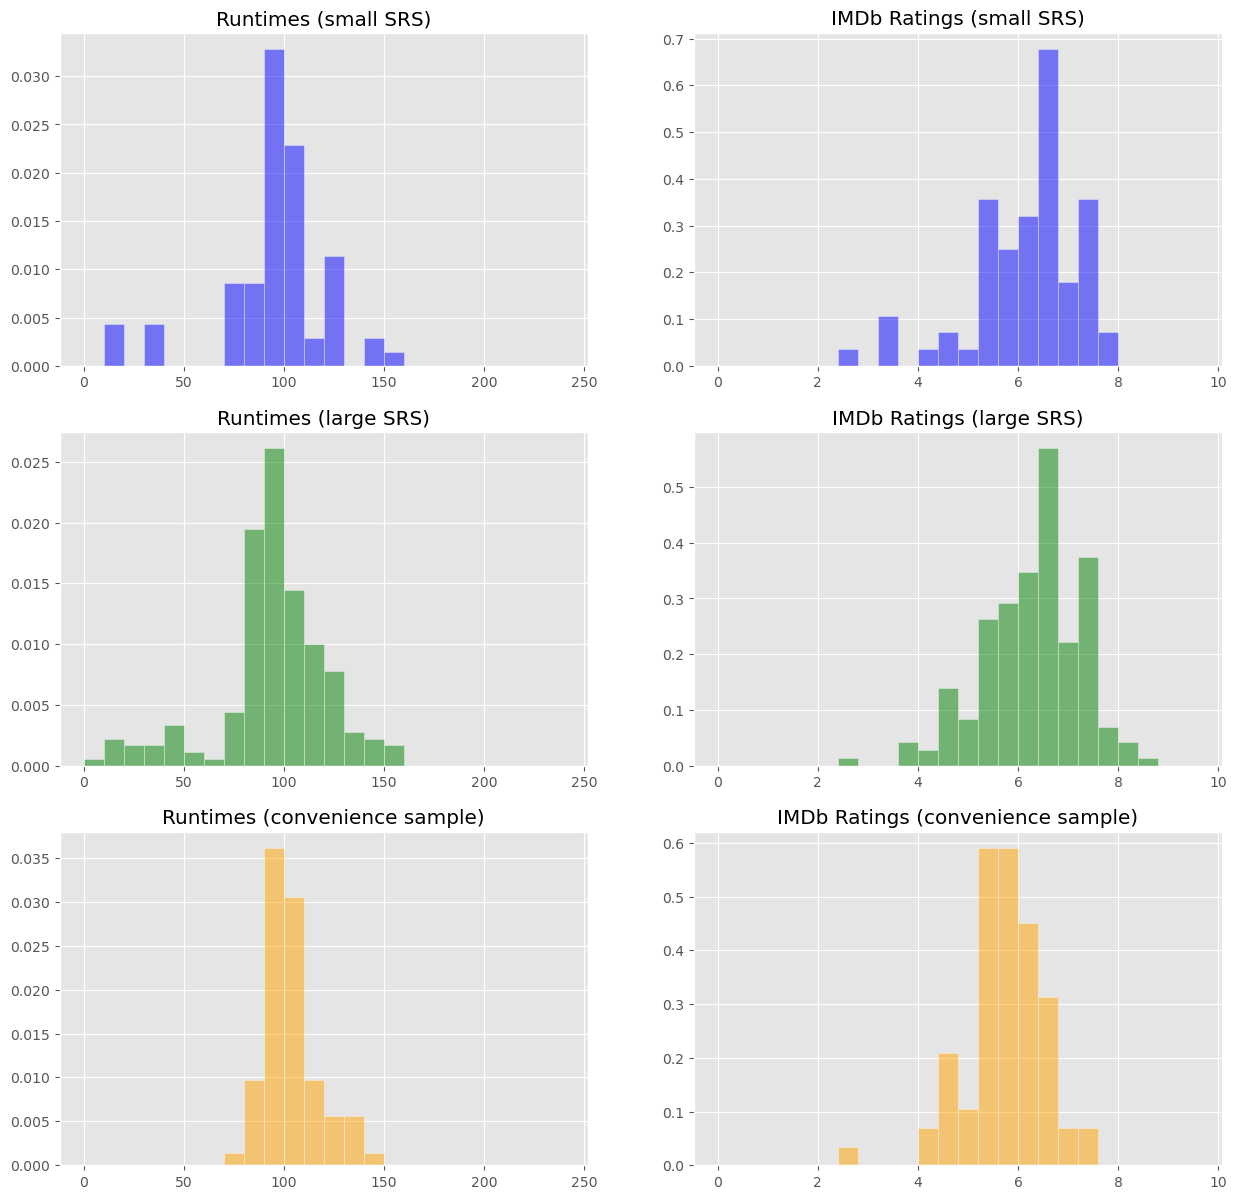

In [23]:
# Don't change this cell, but do run it.
small_srs_data = bpd.read_csv('data/small_srs_rating.csv').set_index('Title')
large_srs_data = bpd.read_csv('data/large_srs_rating.csv').set_index('Title')

small_stats = compute_statistics(small_srs_data, draw=False);
large_stats = compute_statistics(large_srs_data, draw=False);
convenience_stats = compute_statistics(convenience_sample, draw=False);

print('Full data stats:                 ', movie_stats)
print('Small SRS stats:', small_stats)
print('Large SRS stats:', large_stats)
print('Convenience sample stats:        ', convenience_stats)

color_dict = {
    'small SRS': 'blue',
    'large SRS': 'green',
    'convenience sample': 'orange'
}

plt.subplots(3, 2, figsize=(15, 15), dpi=100)
i = 1

for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('Runtime'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 250, 10))
    plt.title(f'Runtimes ({name})');

i = 2
for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('IMDb Score'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 10, 0.4))
    plt.title(f'IMDb Ratings ({name})');

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  One reason is that doing so can help us understand how inaccurate other samples are.

As we saw in Lecture 14, DataFrames have a `.sample` method for producing simple random samples.  Note that its default is to sample **without** replacement, which aligns with how simple random samples are drawn.

**Question 2.4.** Produce a simple random sample of size 70 from `movie_data`. Store an array containing the mean `'Runtime'` and mean `'IMDb Score'` of your SRS in `my_small_stats`. Again, it's fine if histograms are displayed.

Remember, simple random samples are drawn _without_ replacement!

array([100.52857143,   6.14285714])

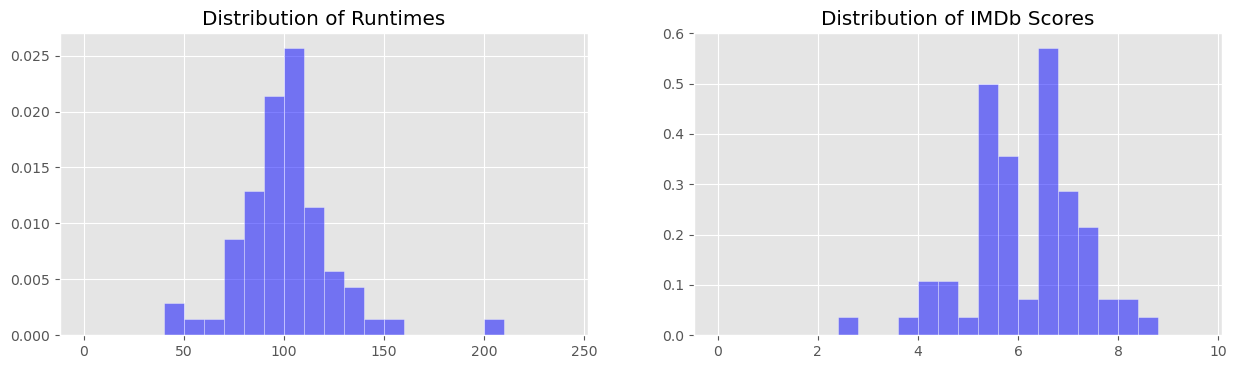

In [24]:
my_small_stats = compute_statistics(movie_data.sample(70, replace=False))
my_small_stats

Run the cell in which `my_small_stats` is defined many times, to collect new samples and compute their sample means.

<br>

Now, recall, `small_stats` is an array containing the mean `'Runtime'` and mean `'IMDb Score'` for the one small SRS that we provided you with:

In [25]:
small_stats

array([94.74285714,  6.16571429])

Answer the following two-fold question:
- Are the values in `my_small_stats` (the mean `'Runtime'` and `'IMDb Score'` for **your** small SRS) similar to the values in `small_stats` (the mean `'Runtime'` and `'IMDb Score'` for the small SRS **we provided you with**)? 
- Each time you collect a new sample – i.e. each time you re-run the cell where `my_small_stats` is defined – do the values in `my_small_stats` change a lot?

Assign either 1, 2, 3, or 4 to the variable `sampling_q4` below.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and change a bit each time a new sample is collected.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and don't change at all each time a new sample is collected.
1. The values in `my_small_stats` are slightly different from the values in `small_stats`, and change a bit each time a new sample is collected.
1. The values in `my_small_stats` are very different from the values in `small_stats`, and don't change at all each time a new sample is collected.

In [26]:
sampling_q4 = 3

In [27]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Similarly, create a simple random sample of size 180 from `movie_data` and store an array of the sample's mean `'Runtime'` and mean `'IMDb Score'` in `my_large_stats`.

array([92.05      ,  6.33833333])

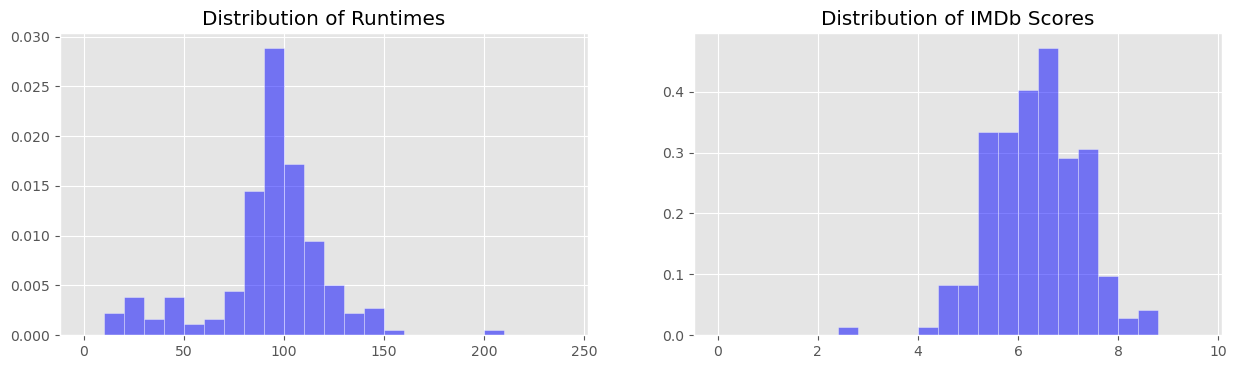

In [28]:
my_large_stats = compute_statistics(movie_data.sample(180, replace=False))
my_large_stats

Run the cell in which `my_large_stats` is defined many times. Do the histograms and  mean statistics (mean `'Runtime'` and mean `'IMDb Score'`) seem to change more or less across samples of size 180 than across samples of size 70?

Assign either 1, 2, or 3 to the variable `sampling_q5` below. 

1. The statistics change *less* across samples of size 180 than across samples of size 70.
1. The statistics change an *equal amount* across samples of size 180 and across samples of size 70.
1. The statistics change *more* across samples of size 180 than across samples of size 70.

In [29]:
sampling_q5 = 1

In [30]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Chocolate Shop  🍫

You are planning to open a chocolate shop! To get a sense of the local residents' chocolate preferences, you survey 510 randomly-selected local residents and ask which type of chocolate they prefer the most among four options – `'dark'`, `'milk'`, `'white'`, `'bittersweet'`. You also record some indecisive individuals as `'undecided'`.

Run the next cell to load in the results of the survey.

In [31]:
survey = bpd.read_csv('data/chocolate.csv')
survey

,chocolate
0,dark
1,milk
2,white
3,white
4,undecided
...,...
505,white
506,dark
507,bittersweet
508,white


What you're truly interested in, though, is the proportion of *all local residents* that prefer each type of chocolate. These are *population parameters* (plural, because there are five proportions).

<center><img src="images/choco-pun.jpeg" width=35%></center>

Your friends tell you that dark chocolate is popular and that your shop should focus on dark chocolate-based creations. To make an informed decision, you decide to look at your survey data to determine the proportion of local residents that prefer `'dark'` chocolate over all other types of chocolate.

**Question 3.1.** Ideally, you want to determine the exact proportion of residents who prefer `'dark'` chocolate among all the local residents. However, it's not feasible to survey everyone in the area. Instead, you collected a sample of responses to obtain a ____________ statistic to estimate this ____________ parameter.

Complete the sentence above by filling in the blanks. Set `q3_1` to 1 or 2.

1. sample; population
1. population; sample

In [32]:
q3_1 = 1

In [33]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2** Start by calculating the proportion of residents in your sample who prefer `'dark'` chocolate. Assign this value to `dark_proportion`.



In [34]:
dark_proportion = np.count_nonzero(survey.get('chocolate') == 'dark') / survey.shape[0]
dark_proportion

0.2823529411764706

In [35]:
grader.check("q3_2")

q3_2 results: All test cases passed!

You're done! Or are you? You have a single estimate for the true proportion of residents who prefer `'dark'` chocolate. However, you don't know how close that estimate is, or how much it could have varied if you'd had a different sample. In other words, you have an estimate, but no understanding of how close that estimate is to the true proportion of all local residents who prefer `'dark'` chocolate.

This is where the idea of resampling via **[bootstrapping](https://inferentialthinking.com/chapters/13/2/Bootstrap.html)** comes in. Assuming that our sample resembles the population fairly well, we can resample from our original sample to produce more samples. From each of these resamples, we can produce another estimate for the true proportion of residents who prefer `'dark'` chocolate, which gives us a distribution of sample proportions that describes how the estimate might vary given different samples. We can then use this distribution to understand the variability in the estimated proportion of residents who prefer `'dark'` chocolate.


**Question 3.3.** Now, let's use bootstrapping to get a sense of the distribution of the sample proportion. Complete the following code to produce 1,000 bootstrapped estimates for the proportion of residents who prefer `'dark'` chocolate. Store your 1,000 estimates in an array named `boot_dark_proportions`.

In [36]:
boot_dark_proportions = np.array([])
for i in np.arange(1000):
    resample = survey.sample(70, replace=False)
    resample_proportion = np.count_nonzero(resample.get('chocolate') == 'dark') / resample.shape[0]
    boot_dark_proportions = np.append(boot_dark_proportions, resample_proportion)
boot_dark_proportions

array([0.31428571, 0.28571429, 0.21428571, 0.25714286, 0.28571429,
       0.2       , 0.28571429, 0.3       , 0.34285714, 0.25714286,
       0.28571429, 0.27142857, 0.2       , 0.27142857, 0.38571429,
       0.21428571, 0.3       , 0.32857143, 0.32857143, 0.3       ,
       0.17142857, 0.24285714, 0.2       , 0.31428571, 0.24285714,
       0.34285714, 0.31428571, 0.17142857, 0.2       , 0.21428571,
       0.34285714, 0.3       , 0.24285714, 0.28571429, 0.25714286,
       0.21428571, 0.25714286, 0.25714286, 0.31428571, 0.32857143,
       0.37142857, 0.2       , 0.27142857, 0.28571429, 0.17142857,
       0.25714286, 0.32857143, 0.34285714, 0.24285714, 0.27142857,
       0.24285714, 0.21428571, 0.28571429, 0.32857143, 0.27142857,
       0.28571429, 0.24285714, 0.25714286, 0.3       , 0.28571429,
       0.28571429, 0.2       , 0.28571429, 0.22857143, 0.24285714,
       0.31428571, 0.24285714, 0.22857143, 0.28571429, 0.28571429,
       0.24285714, 0.28571429, 0.31428571, 0.24285714, 0.31428

In [37]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Using the array `boot_dark_proportions`, compute an approximate **95%** confidence interval for the true proportion of residents who prefer `'dark'` chocolate.  Compute the lower and upper ends of the interval, named `dark_lower_bound` and `dark_upper_bound`, respectively.

In [38]:
dark_lower_bound = np.percentile(boot_dark_proportions, 2.5)
dark_upper_bound = np.percentile(boot_dark_proportions, 97.5)

# Print the confidence interval:
print("Bootstrapped 95% confidence interval for the true proportion of residents who prefer dark chocolate in the population:\n[{:f}, {:f}]".format(dark_lower_bound, dark_upper_bound))

Bootstrapped 95% confidence interval for the true proportion of residents who prefer dark chocolate in the population:
[0.200000, 0.371429]


In [39]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.**
Is it true that 95% of the population lies in the range `dark_lower_bound` to `dark_upper_bound`? Assign the variable `q3_5` to either `True` or `False`. 

In [40]:
q3_5 = False

In [41]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.**
Is it true that the proportion of residents in the populuation who prefer `'dark'` chocolate over the other chocolates is a random quantity with approximately a 95% chance of falling between `dark_lower_bound` and `dark_upper_bound`? Assign the variable `q3_6` to either `True` or `False`.

In [42]:
q3_6 = True

In [43]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.**
Suppose we were somehow able to produce 20,000 new samples, each one a uniform random sample of 510 residents taken directly from the population. For each of those 20,000 new samples, we create a 95% confidence interval for the proportion of residents who prefer `'dark'` chocolate. Roughly how many of those 20,000 intervals should we expect to actually contain the true proportion of the population? Assign your answer to the variable `how_many` below. It should be of type `int`, representing the *number* of intervals, not the proportion or percentage.

In [44]:
how_many = int(20_000 * 0.95)
how_many

19000

In [45]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** We also created 90%, 96%, and 99% confidence intervals from one sample (shown below), but forgot to label which confidence intervals were which! Match the interval to the percent of confidence the interval represents and assign your choices (either 1, 2, or 3) to variables `ci_90`, `ci_96`, and `ci_99`, corresponding to the 90%, 96%, and 99% confidence intervals respectively.

*Hint*: Drawing the confidence intervals out on paper might help you visualize them better.


1. $[0.245, 0.325]$


2. $[0.237,  0.331]$


3. $[0.251, 0.318]$


In [51]:
print(0.325 - 0.245)
print(0.331 - 0.237)
print(0.318 - 0.251)

0.08000000000000002
0.09400000000000003
0.067


In [52]:
ci_90 = 3
ci_96 = 1
ci_99 = 2
ci_90, ci_96, ci_99

(3, 1, 2)

In [53]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Based on the results in `survey`, it seems that `'dark'` chocolate is more popular than `'milk'` chocolate among residents. We would like to construct a range of likely values – that is, a confidence interval – for the difference in popularity, which we define as:

$$\text{(Proportion of residents who prefer dark chocolate)} - \text{(Proportion of residents who prefer milk chocolate)}$$

Create a function, `differences_in_resamples`, that creates **1000 bootstrapped resamples of the original survey data** in the `survey` DataFrame, computes the difference in proportions for each resample, and returns an array of these differences. Store your bootstrapped estimates in an array called `boot_differences` and plot a histogram of these estimates.

***Hints:*** 
- Use your code from Question 3.3 as a starting point.
- To plot your histogram, you'll first need to create a DataFrame with one column, whose entries are the values in `boot_differences`. 

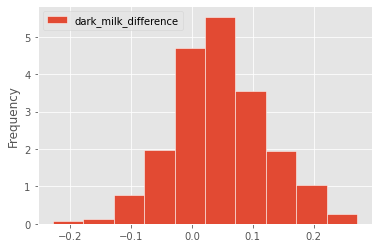

In [93]:
def differences_in_resamples():
    np.random.seed(55) # Ignore this, and don't change it. It's here to make sure you get the same answer we did.
    
    difference_array = np.array([])
    
    for i in np.arange(1000):
        resample = survey.sample(70, replace=False)
        dark_proportion = np.count_nonzero(resample.get('chocolate') == 'dark') / resample.shape[0]
        milk_proportion = np.count_nonzero(resample.get('chocolate') == 'milk') / resample.shape[0]
        difference_array = np.append(difference_array, (dark_proportion - milk_proportion))

    return difference_array

boot_differences = differences_in_resamples()

# Plot a histogram of boot_differences.
bpd.DataFrame().assign(
    dark_milk_difference=boot_differences
).plot(kind='hist', y='dark_milk_difference', density=True, ec='w');



In [64]:
grader.check("q3_9")

q3_9 results: All test cases passed!

**Question 3.10.** Compute an approximate 95% confidence interval for the difference in proportions. Assign the lower and upper bounds of the interval to `diff_lower_bound` and `diff_upper_bound`, respectively.

In [100]:
diff_lower_bound = np.percentile(boot_differences, 2.5)
diff_upper_bound = np.percentile(boot_differences, 97.5)

# Print the confidence interval:
print("Bootstrapped 95% confidence interval for the difference in popularity between dark chocolate and milk chocolate:\n[{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for the difference in popularity between dark chocolate and milk chocolate:
[-0.100000, 0.200000]


In [66]:
grader.check("q3_10")

q3_10 results: All test cases passed!

**Question 3.11.** In this question, you computed two 95% confidence intervals:
- In Question 3.4, you found a 95% confidence interval for the proportion of residents who prefer `'dark'` chocolate among the four chocolate options. Let's call this the "dark chocolate CI."
- In Question 3.10, you found a 95% confidence interval for the difference between the proportion of residents who prefer `'dark'` chocolate and the proportion of residents who prefer `'milk'` chocolate. Let's call this the "difference CI." 

Choose how to best fill in the blanks to describe the widths of these two confidence intervals. Set Set `q3_11` to either 1, 2, 3, or 4.

>The dark chocolate CI is ________________________ than the difference CI because we have a ________________________ for a single unknown parameter than the difference between two unknown parameters.

1. wider; more accurate guess
1. narrower; more accurate guess
1. wider; less accurate guess
1. narrower; less accurate guess

In [71]:
print(abs(0.200000 - 0.371429))
print(abs(-0.072143 - 0.171429))

0.171429
0.243572


In [69]:
q3_11 = 2

In [70]:
grader.check("q3_11")

q3_11 results: All test cases passed!

## 4. Hotels in Europe ✈️❄️

You and your friends are planning a vacation to Europe for winter break! You have been considering four cities to visit: Sarajevo (in Bosnia and Herzegovina), Zagreb (in Croatia), Belgrade (in Serbia), and Ljubljana (in Slovenia). Sadly, as college students, you have a limited budget and only want to spend one week, so it might be too short to visit all four cities.  In planning your trip, you are wondering which city has the cheapest hotels.

For the four cities above, you gathered hotel data from [Booking.com](https://www.booking.com/), an online booking website for travel. The DataFrame `hotels` below contains a **sample** of all the hotels in the four cities above. Each row corresponds to a particular hotel. We have information on the `'Hotel name'`, the `'City'`, the `'Price (BAM)'` for a one night stay (in BAM, the [currency of Bosnia and Herzegovina](https://en.wikipedia.org/wiki/Bosnia_and_Herzegovina_convertible_mark)), the `'Hotel star rating'` from 1 to 5, and the `'Customer rating'` from 1 to 10 . Now it’s time to analyze the price and rating of hotels for each city!

In [72]:
hotels = bpd.read_csv('data/hotels.csv')
hotels

,Hotel name,City,Price (BAM),Hotel star rating,Customer rating
0,Academia,Zagreb,190,4,8.9
1,Adora Hotel,Ljubljana,120,3,9.0
2,Allegro Hotel,Ljubljana,106,4,8.5
3,Atelier Hotel,Ljubljana,100,3,8.9
4,Austria Trend Hotel,Ljubljana,137,4,8.8
...,...,...,...,...,...
69,Viena,Zagreb,164,3,8.0
70,WUD Hotel,Ljubljana,121,3,8.9
71,Zagreb,Zagreb,158,2,6.9
72,intercontinental,Ljubljana,241,5,9.0


**Question 4.1.** Let's start by determining the mean price for each city. Create a DataFrame called `city_means`, indexed by `'City'`, with one column called `'Price (BAM)'` that contains the mean price for that city, in the original currency. Sort `city_means` in descending order of `'Price (BAM)'`.

In [76]:
city_means = (
    hotels
    .groupby('City')
    .mean()
    .get(['Price (BAM)'])
)
city_means

,Price (BAM)
City,
Belgrade,172.318182
Ljubljana,173.136364
Sarajevo,167.800000
Zagreb,188.466667


In [77]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** One of your friends mentions they really want to go to Zagreb, being that it is the homeland of the necktie 👔! However, Zagreb seems to have the most expensive hotels based on the data we have access to. With that said, the data we have access to is only a sample of all hotels in four cities, and thus the mean price for Zagreb that we computed above is only a sample statistic, not a population parameter.

Produce 1,000 bootstrapped estimates for the mean price of **all** hotels in the city of Zagreb. Store the estimates in the `zagreb_averages` array. Then, use the `zagreb_averages` array to calculate an approximate **99% confidence interval** for the true mean price. Assign the endpoints of your interval to `lower_bound` and `upper_bound`.

***Hint:*** Make sure to query **before** resampling!

'A 99% confidence interval for average hotel price in Zagreb is [167.1, 207.4].'

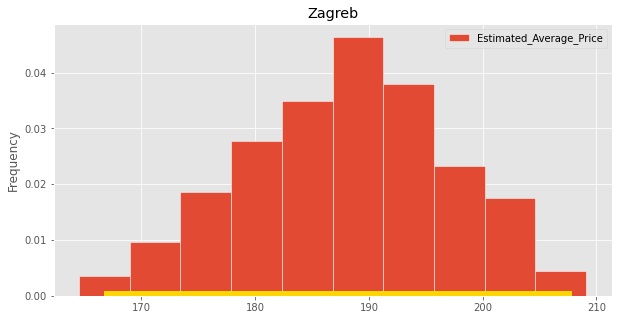

In [136]:
zagreb_averages = np.array([])

for i in range(1000):
    resample = hotels[hotels.get('City') == 'Zagreb'].sample(10, replace=False)
    zagreb_mean = (
        resample
        .get('Price (BAM)')
        .mean()
    )
    zagreb_averages = np.append(zagreb_averages, zagreb_mean)

lower_bound = np.percentile(zagreb_averages, 0.5)
upper_bound = np.percentile(zagreb_averages, 99.5)

# Display the estimates in a histogram.
bpd.DataFrame().assign(Estimated_Average_Price=zagreb_averages).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title="Zagreb");
plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');

# Don't change what's below (though you will need to copy and change it in 4.3).
city_name = 'Zagreb'
f'A 99% confidence interval for average hotel price in {city_name} is [{lower_bound}, {upper_bound}].'

In [89]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** You want to create the same histogram above for the other three cities, and also calculate the corresponding confidence intervals, but repeating the process above three more times would be redundant. Let's try to generalize what we did in Question 4.2 to work for any city! 

Create a function called `ci_and_hist`, which takes in a city name as a string, and:
1. **Plots the histogram** of 1,000 bootstrapped estimates for the city's mean hotel price.
2. **Returns** a string describing the approximate 99% confidence interval for the city's mean hotel price, formatted in the same way as the string displayed for Zagreb in Question 4.2. 

***Notes:*** 
- Make sure your function both plots a histogram and **returns** a string. For example, `ci_and_hist('Ljubljana')` should return a string that starts with `'A 99% confidence interval for average hotel price in Ljubljana is'`. It's ok if you see the return string displayed before the plot.
- The string displayed at the end of 4.2 was created using a feature of Python called f-strings. You'll need to copy and change that f-string expression. Read [this article](https://realpython.com/python-f-strings/#simple-syntax) for more details about f-strings if you're interested.

A 99% confidence interval for average hotel price in Ljubljana is [128.595, 222.0015]
A 99% confidence interval for average hotel price in Sarajevo is [135.3975, 200.60049999999998]


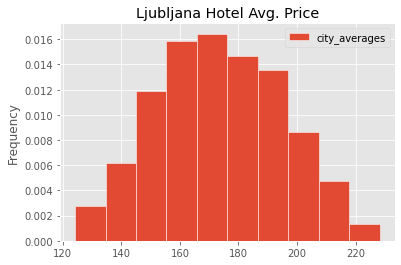

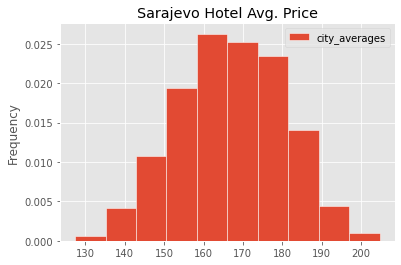

In [132]:
def ci_and_hist(city_name):
    city_averages = np.array([])

    for i in range(1000):
        resample = hotels[hotels.get('City') == city_name].sample(10, replace=False)
        city_mean = (
            resample
            .get('Price (BAM)')
            .mean()
        )
        
        city_averages = np.append(city_averages, city_mean)
    
    (
        bpd
        .DataFrame()
        .assign(
            city_averages=city_averages
        )
        .plot(kind='hist', y='city_averages', density=True, ec='w', title=f'{city_name} Hotel Avg. Price')
    );
    
    lower_bound = np.percentile(city_averages, 0.5)
    upper_bound = np.percentile(city_averages, 99.5)

    return f'A 99% confidence interval for average hotel price in {city_name} is [{lower_bound}, {upper_bound}]'
    
# Example calls to the function. Don't change the lines below.
ljubljana_string = ci_and_hist('Ljubljana')
print(ljubljana_string)
sarajevo_string = ci_and_hist('Sarajevo')
print(sarajevo_string)

In [122]:
grader.check("q4_3")

q4_3 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

In [123]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_11 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!